In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cardio = pd.read_csv('./data/cardio_train.csv', sep = ';')
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [177]:
df_cardio['ap_lo'].min(), df_cardio['ap_hi'].min(), df_cardio['ap_lo'].max(), df_cardio['ap_hi'].max()

(-70, -150, 11000, 16020)

## Metrics overview
- ap_hi is Systolic blood pressure. Normal 120 or little below, max 200, considered low under 90. Hard to find realistic lowest viable value, maybe 60 ? In some extreme case some humans can survive up to 300.
- ap_lo Diastolic blood pressure Normal 80,  Max 140, considered low under 60 unrealistic under 40 ?
- height 251 max

In [178]:
df_cardio['age_years'] = df_cardio['age'].apply(lambda x : x/365)
df_cardio['age_years'].min(), df_cardio['age_years'].max()
#Age range seems all good

(29.583561643835615, 64.96712328767123)

In [179]:
data_filters = ['ap_hi > 300 or ap_hi < 60 ', 'height < 80', 'weight < 30', 'ap_lo > 200 or ap_lo < 40']
for condition in data_filters:
    df_cardio.drop(df_cardio.query(condition).index, axis=0, inplace = True)

df_cardio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68749 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68749 non-null  int64  
 1   age          68749 non-null  int64  
 2   gender       68749 non-null  int64  
 3   height       68749 non-null  int64  
 4   weight       68749 non-null  float64
 5   ap_hi        68749 non-null  int64  
 6   ap_lo        68749 non-null  int64  
 7   cholesterol  68749 non-null  int64  
 8   gluc         68749 non-null  int64  
 9   smoke        68749 non-null  int64  
 10  alco         68749 non-null  int64  
 11  active       68749 non-null  int64  
 12  cardio       68749 non-null  int64  
 13  age_years    68749 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


### a)

In [180]:
cardio_count = df_cardio['cardio'].value_counts()
print(f"In the dataset, {cardio_count[1]} people suffer from an heart condition, and {cardio_count[0]} don't")


In the dataset, 34027 people suffer from an heart condition, and 34722 don't


### b)

<AxesSubplot:ylabel='cholesterol'>

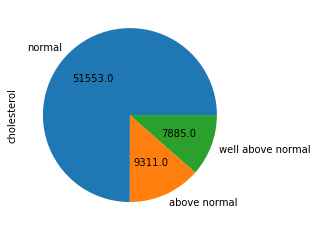

In [181]:
import numpy as np

labels = ['normal', 'above normal', 'well above normal']
chol_count = df_cardio['cholesterol'].value_counts()

def absolute_value(val): #https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed
    a  = np.round(val/100.*chol_count.sum(), 0)
    return a


chol_count.plot.pie(labels = labels,  autopct=absolute_value)

<AxesSubplot:xlabel='age_years', ylabel='Count'>

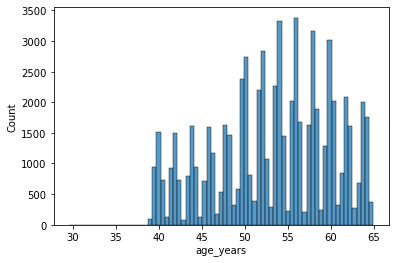

In [182]:
#Round age years
sns.histplot(x = df_cardio['age_years'])

([<matplotlib.patches.Wedge at 0x7fe21f1dce80>,
 [Text(-1.058229258517367, 0.30025128878621643, 'non-smoker'),
  Text(1.058229286628917, -0.3002511897076411, 'smoker')],
 [Text(-0.577215959191291, 0.16377343024702715, '91%'),
  Text(0.5772159745248636, -0.16377337620416785, '9%')])

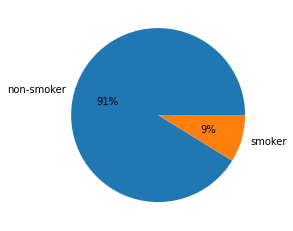

In [183]:
smoke = ['non-smoker', 'smoker']
plt.pie(df_cardio['smoke'].value_counts(), labels = smoke, autopct='%.0f%%')

## 2.1.0 BMI

In [184]:
#BMI = kg/m2
df_cardio['BMI'] = df_cardio.apply(lambda row : 1.3 * (row.weight / (row.height /100)**2.5), axis =1)#new BMI

In [185]:
df_cardio['BMI'].describe()

count    68749.000000
mean        27.928433
std          6.102628
min         10.695048
25%         24.129455
50%         26.652099
75%         30.705138
max        404.239164
Name: BMI, dtype: float64

In [186]:
df_cardio.drop(df_cardio.query('BMI > 50 or BMI <12').index, axis=0, inplace = True)
df_cardio.shape


(68458, 15)

In [187]:
#BMI = kg/m2
#bmi_intervals = {"underweight": (0,18.4), "normal" :(18.5,24.9), "over":(25,29.9), "obese":(30)}

def bmi_cat(bmi):
    if bmi <18.5:
        cat = 1
    elif 18.5 <= bmi < 25:
        cat = 2
    elif 25 <= bmi < 30:
        cat = 3
    elif 30 <= bmi < 35:
        cat = 4
    elif 35 <= bmi < 40:
        cat = 5
    else:
        cat = 6 
    return cat

df_cardio['BMI_cat'] = df_cardio.apply(lambda row : bmi_cat(row.BMI), axis = 1)
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_cat
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,22.032402,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,36.353881,5
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.791042,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.950792,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.736986,29.738803,3
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,27.007460,3
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,30.130402,4
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.593503,3


/Users/leolassarade/miniconda3/envs/ML-ll/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI_cat', ylabel='count'>

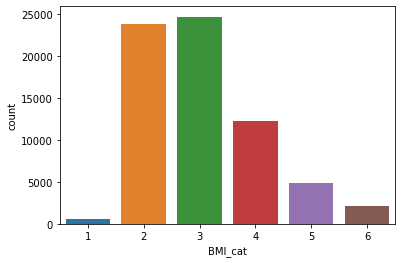

In [188]:
sns.countplot(df_cardio['BMI_cat'])

In [189]:
df_cardio.query('BMI_cat == 6')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_cat
30,42,18291,1,155,105.0,120,80,3,1,0,0,1,1,50.112329,45.635562,6
46,61,18207,1,162,107.0,150,90,2,1,0,0,1,1,49.882192,41.642768,6
88,121,23204,1,151,92.0,130,90,1,1,0,0,0,1,63.572603,42.686329,6
212,291,22570,1,162,105.0,140,90,3,1,0,0,0,1,61.835616,40.864399,6
261,358,21059,1,154,98.0,140,90,2,1,0,0,1,0,57.695890,43.288010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69406,99140,18435,1,156,99.9,120,80,1,1,0,0,1,0,50.506849,42.726503,6
69563,99354,14617,1,161,105.0,120,80,1,1,0,0,1,1,40.046575,41.501898,6
69588,99399,18864,1,155,101.0,140,80,3,2,0,0,1,1,51.682192,43.897065,6
69946,99925,21333,1,164,115.0,130,80,1,1,0,0,1,1,58.446575,43.404182,6


In [190]:
def blood_pressure_cat(syst, diast):
    if syst <120 and diast <80:
        cat = 1
    elif 120 <= syst <130 and diast <80:
        cat = 2
    elif 130<= syst <140 or 80 <= diast <90:
        cat = 3
    elif syst >=140 or diast >=90:
        cat = 4
    else:
        cat = 5
    return cat

<AxesSubplot:xlabel='BP_cat', ylabel='count'>

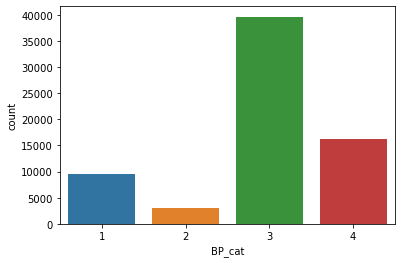

In [191]:
df_cardio['BP_cat'] = df_cardio.apply(lambda row : blood_pressure_cat(row.ap_hi, row.ap_lo), axis = 1)
sns.countplot(data = df_cardio, x= 'BP_cat')


Check against BMI category, gender, blood pressure cat

<AxesSubplot:xlabel='BMI_cat', ylabel='Heart_disease'>

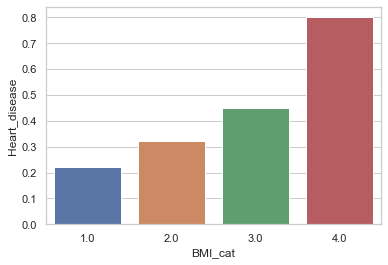

In [243]:
#condition = 'BP_cat == 1 and cardio ==1'
#fig, ax = plt.subplot(), plt.axes()

counts =[]
proportions = []

for i in range(1,5):
    count = len(df_cardio.query(f'BP_cat == {i} and cardio ==1'))
    proportion = count / len(df_cardio.query(f'BP_cat == {i}')) 
    counts.append(count)
    proportions.append(proportion)

df_bmi = pd.DataFrame([range(1,5), counts, proportions]).T
df_bmi.columns = ['BMI_cat', 'Count', 'Heart_disease']


sns.set_theme(style="whitegrid")
sns.barplot(x = df_bmi.BMI_cat,y = df_bmi.Heart_disease)

In [250]:
#condition = 'BP_cat == 1 and cardio ==1'
#fig, ax = plt.subplot(), plt.axes()

counts =[]
proportions = []

for i in range(1,5):
    count = len(df_cardio.query(f'BP_cat == {i} and cardio ==1'))
    proportion = count / len(df_cardio.query(f'BP_cat == {i}')) 
    counts.append(count)
    proportions.append(proportion)

df_bp = pd.DataFrame([range(1,5), counts, proportions]).T
df_bp.columns = ['BP_cat', 'Count', 'Heart_disease']



In [251]:
#condition = 'BP_cat == 1 and cardio ==1'
#fig, ax = plt.subplot(), plt.axes()

counts =[]
proportions = []

for i in range(1,7):
    count = len(df_cardio.query(f'BMI_cat == {i} and cardio ==1'))
    proportion = count / len(df_cardio.query(f'BMI_cat == {i}')) 
    counts.append(count)
    proportions.append(proportion)

df_bmi = pd.DataFrame([range(1,7), counts, proportions]).T
df_bmi.columns = ['BMI_cat', 'Count', 'Heart_disease']




<AxesSubplot:xlabel='BMI_cat', ylabel='Heart_disease'>

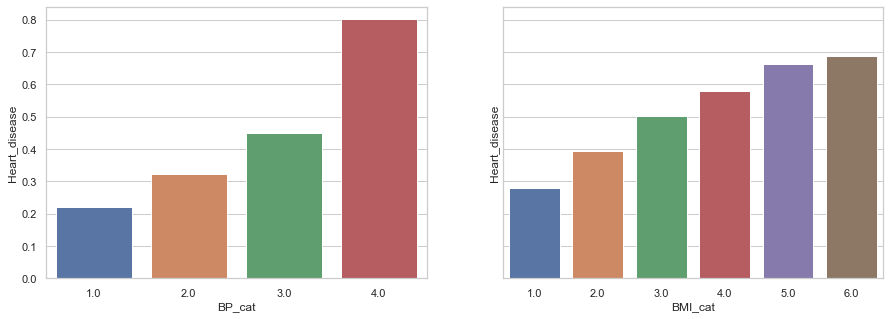

In [270]:
fig, axs = plt.subplots(1,2, figsize = (15,5), sharey= True)
sns.set_theme(style="whitegrid")
sns.barplot(x = df_bp.BP_cat,y = df_bp.Heart_disease, ax = axs[0])
sns.barplot(x = df_bmi.BMI_cat,y = df_bmi.Heart_disease, ax = axs[1])

